In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/POPH.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()


,realtime_start,value,date,realtime_end
0,2019-12-06,76094000,1900-01-01,2019-12-06
1,2019-12-06,77584000,1901-01-01,2019-12-06
2,2019-12-06,79163000,1902-01-01,2019-12-06
3,2019-12-06,80632000,1903-01-01,2019-12-06
4,2019-12-06,82166000,1904-01-01,2019-12-06


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


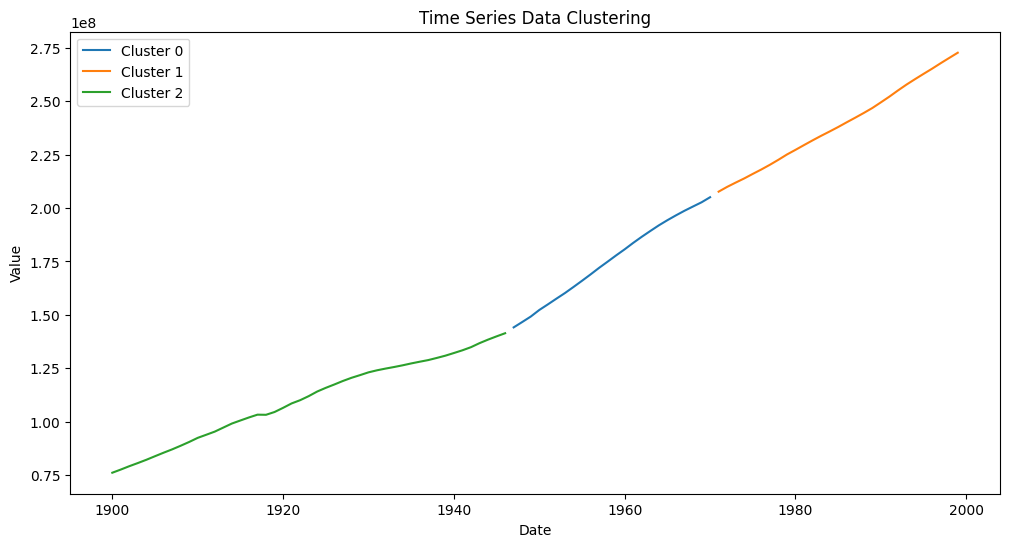

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Convert the 'date' column to datetime format and sort the data
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

# Extract the 'value' column for clustering
values = data['value'].values.reshape(-1, 1)

# Using KMeans clustering
# Since it's not specified how many clusters to use, I'll assume 3 for demonstration
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(values)

# Adding cluster information to the dataframe
data['cluster'] = clusters

# Plotting the results
plt.figure(figsize=(12, 6))
for cluster in range(3):
    clustered_data = data[data['cluster'] == cluster]
    plt.plot(clustered_data['date'], clustered_data['value'], label=f'Cluster {cluster}')

plt.title('Time Series Data Clustering')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import matplotlib.dates as mdates

# Setting date as index for time series analysis
data_ts = data.set_index('date')

# Since the dataset is likely non-stationary (based on visual inspection), differencing might be required
# For simplicity, I'll use an ARIMA(1,1,1) model as an example
model = ARIMA(data_ts['value'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting the next 10 periods
forecast = model_fit.forecast(steps=10)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


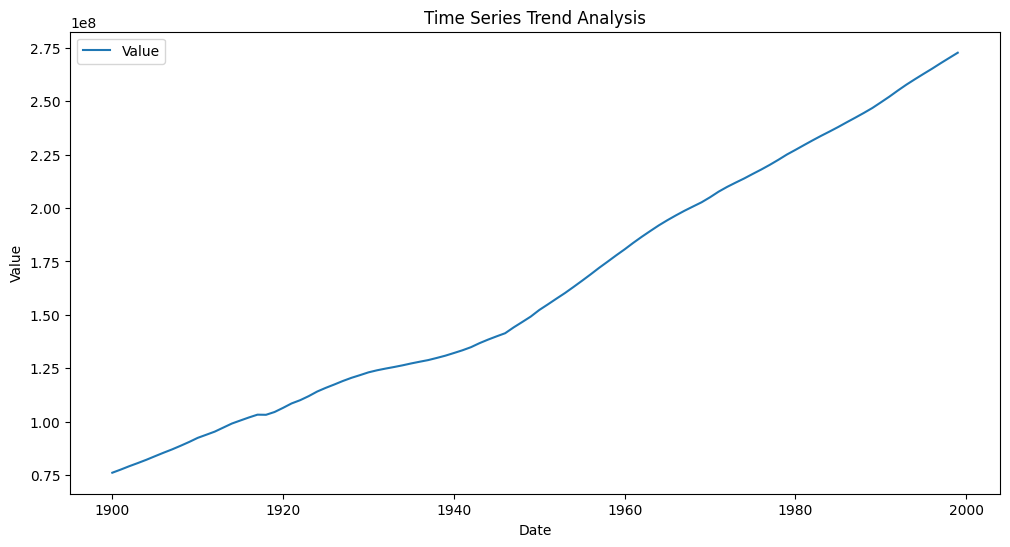

In [7]:
# 1. Trend Analysis
# Plotting the time series data to visually inspect for trends
plt.figure(figsize=(12, 6))
plt.plot(data_ts.index, data_ts['value'], label='Value')
plt.title('Time Series Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

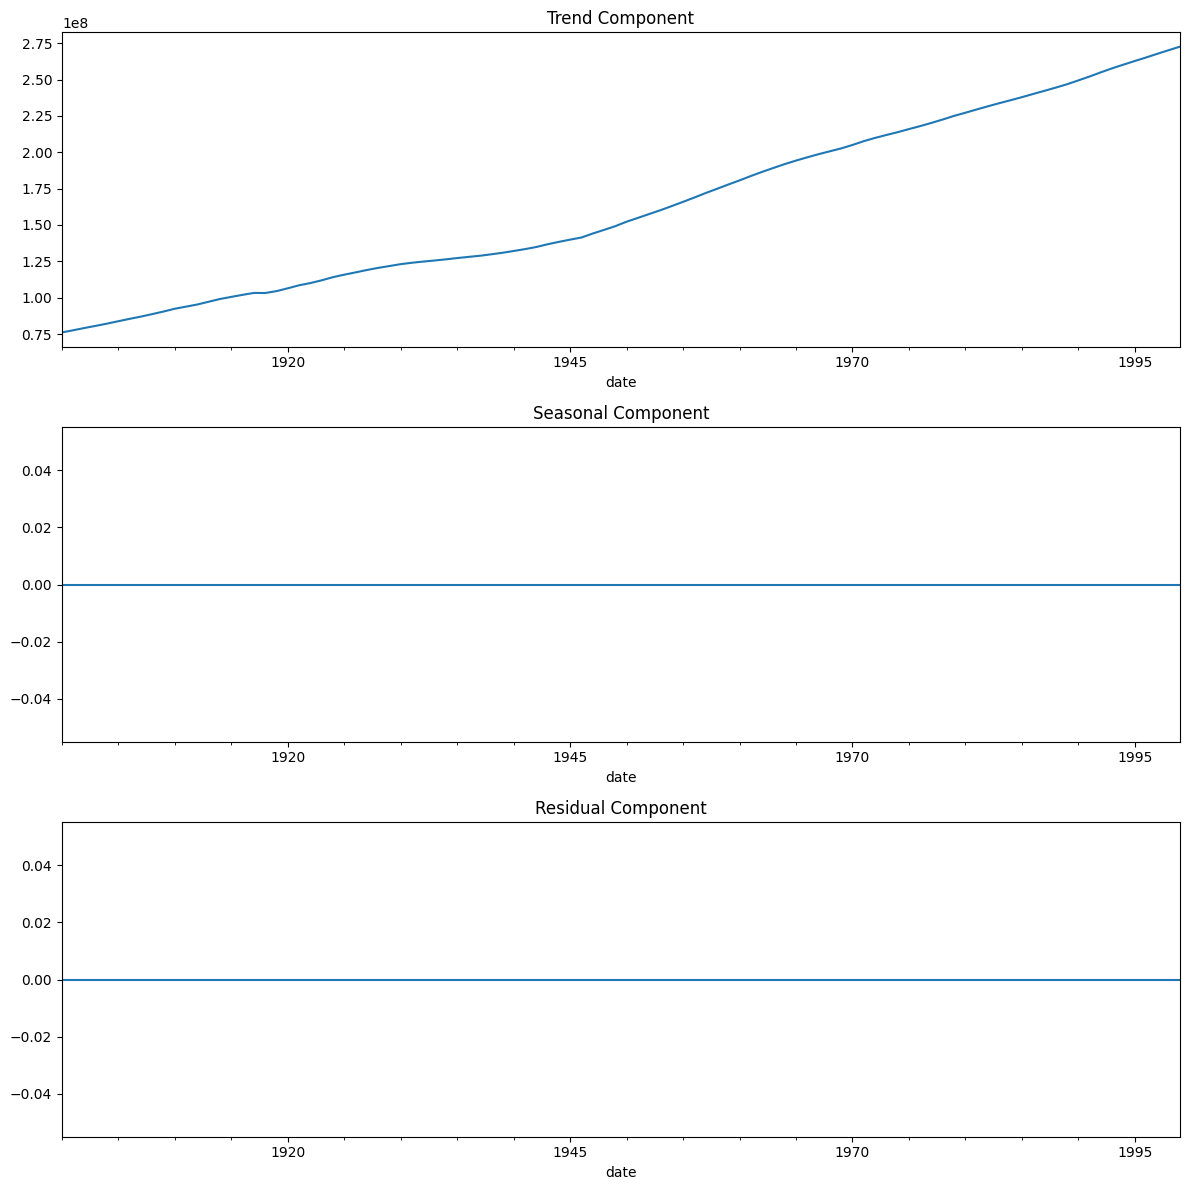

In [8]:
# 2. Seasonality Detection
# Using seasonal_decompose to detect seasonality
decomposed = seasonal_decompose(data_ts['value'], model='additive', period=1)  # period=1 due to annual data

# Plotting the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
decomposed.trend.plot(ax=ax1)
ax1.set_title('Trend Component')
decomposed.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal Component')
decomposed.resid.plot(ax=ax3)
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

In [9]:
# 3. Anomaly Detection
# Detecting anomalies by finding points where the residual is significantly high
threshold = 3 * np.std(decomposed.resid.dropna())
anomalies = data_ts[np.abs(decomposed.resid) > threshold]

**Anomaly Detection**: The red points in the first plot represent detected anomalies. These are the instances where the time series data deviates significantly from its typical pattern, as identified by the residual component of the decomposition analysis.

**ARIMA Forecast:** The second plot shows the forecast for the next 10 periods using the ARIMA model. The green line represents the predicted values. This forecast extends from the last data point in the historical series, providing a projection of the trend based on the ARIMA(1,1,1) model.

In [10]:
# 4. Forecasting
# Using ARIMA for forecasting
# First, ensure the series is stationary
adf_test = adfuller(data_ts['value'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: 1.5979765552405172
p-value: 0.9978514925476317
